# Proyect 1 - Food sales predictions

## Parte 1

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("/Users/jpyolito/Desktop/Coding_Dojo/Proyect1/foodsales_predictions.csv")
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Parte 2

* Sus datos ya deberían estar cargados en el cuaderno de la parte 1 del proyecto.

* Exploren los datos - ¿Qué necesitan para limpiar estos datos? ¡Límpienlos!  

* Asegúrense de abordar cada una de las siguientes tareas:

1) ¿Cuántas filas y columnas?

2) ¿Cuáles son los tipos de datos en cada variable?

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

4) Identifiquen los valores faltantes.

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

6) Confirmen que no hay valores faltantes después de abordarlos.

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

1. ¿Cuántas filas y columnas?

In [17]:
# numero de filas y columnas
df.shape # (filas, columnas)

(8523, 12)

2. ¿Cuáles son los tipos de datos en cada variable?

In [18]:
#Alternativa 1: .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [19]:
#Alternativa 2: .dtypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3. ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [20]:
# Veamos si existen filas duplicadas
df.duplicated().value_counts() # No hay!

False    8523
dtype: int64

4. Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [21]:
# Veamos variable por variable si hay alguna categoría inconsistente
def contador_valores(columna):
    return df[columna].value_counts()

for variable in df:
    print(variable, ":")
    print(contador_valores(variable))
    print ("-"*60)
# Al ver el output de todas las variables en "text editor", podemos ver que sólo la variable "Item_Fat_Content" tiene inconsistencia, ¡HAGAMOS ALGO AL RESPECTO!

Item_Identifier :
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
------------------------------------------------------------
Item_Weight :
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64
------------------------------------------------------------
Item_Fat_Content :
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------
Item_Visibility :
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
-----------------------------------

In [22]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF":"Low Fat", "reg" : "Regular" , "low fat" : "Low Fat"})

In [23]:
# Veamos el cambio
contador_valores("Item_Fat_Content")

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

5. Identifiquen los valores faltantes.

In [24]:
# al ver la información del punto 3 (.info()), podemos ver que hay 2 variables con info faltante:
df.isnull().sum() # Claramente hay 2variables con datos faltantes "(Item_Weight" y "Outlet_Size")

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

6. Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [25]:
# Vemos que la cantidad de datos nulos por columna no es menor, POR LO QUE NO SE ELIMINARAN FILAS
# También, podemos notar que todas las variables tienen mas del 50% con datos, POR LO TANTO NO SE ELIMINARÁN COLUMNAS

# Nuestra única alternativa es reemplazar los datos faltantes, ¿pero cómo?
# Partamos viendo algun patron con respecto a la variable "Item Weight" con respecto al número de identificación

In [26]:
lista_tuplas = df.groupby("Item_Identifier")[["Item_Weight"]].value_counts().index # guardemos los valores 
# únicos de la variable "Item_Identifier" con su respectivos valores según la varaible "Item_Weight"

for tupla in lista_tuplas:
    identificador = tupla[0]# filtremos según el identificador
    valor_unico = tupla[1]# guardemos el valor único del identificador en cuestión
    filtro = df["Item_Identifier"] == identificador # filtremos según el identificador
    df.loc[filtro,"Item_Weight"] = df.loc[filtro,"Item_Weight"].fillna(valor_unico) # a partir del filtro, rellenemos
    # los datos NaN por el valor único
    
    
    


In [27]:
df.shape

(8523, 12)

In [28]:
# Veamos los datos nulos actualizados (CORRA EL CÓDIGO ANTES DE SEGUIR LEYENDO ESTA CELDA)
df.isnull().sum() # Podemos ver que aun hay 4 valores nulos.
# Al indagar en el groupby de más mas arriba, podemos ver que hay 4 identificadores (FDK57, FDN52, FDE52 Y FDQ60)
# sin ningun tipo de valor en "Item_Weight". Por lo tanto, dado que a 4 filas de dicha columna le faltan datos, cuyos
# identificadores son distintos en cada uno, se procederá a eliminar dichas filas (regla de oro del 2%)

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [29]:
#Eliminación de dichas 4 filas
df.dropna(subset=['Item_Weight'], inplace=True) # OJO que las filas eliminadas tenian datos en "Outlet_Size"
# debido a que su valor de datos nulos no bajó (costos de eliminar filas)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [30]:
# Veamos ahora la variable "Outlet_Size"

# Patrón "Outlet_Type" == "Grocery Store"
relleno1 = df[df["Outlet_Type"] == "Grocery Store"]["Outlet_Size"].value_counts().index[0] #valor "Small"
filtro1 = df.loc[df["Outlet_Type"] == "Grocery Store"] # filtramos acrode a Grocery Store
#---------------------------------FUENTE: Chat GPT------------------
filtro1["Outlet_Size"].fillna(relleno1 , inplace = True) # rellenamos datos nulos a la base filtrada
df.update(filtro1)
#------------------------------------------------------------------

# Patrón "Outlet_Location_Type" == "Tier 2"

relleno2 = df[df["Outlet_Location_Type"] == "Tier 2"]["Outlet_Size"].value_counts().index[0] #valor "Small"
filtro2 = df.loc[df["Outlet_Location_Type"] == "Tier 2"] # filtramos acrode a Tier 2
#---------------------------------FUENTE: Chat GPT------------------
filtro2["Outlet_Size"].fillna(relleno2 , inplace = True) # rellenamos datos nulos a la base filtrada
df.update(filtro2)
#------------------------------------------------------------------

/var/folders/kj/npnp2hyx5mv_ccn5jlth23tr0000gn/T/ipykernel_26392/146500389.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro1["Outlet_Size"].fillna(relleno1 , inplace = True) # rellenamos datos nulos a la base filtrada
/var/folders/kj/npnp2hyx5mv_ccn5jlth23tr0000gn/T/ipykernel_26392/146500389.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro2["Outlet_Size"].fillna(relleno2 , inplace = True) # rellenamos datos nulos a la base filtrada


7. Confirmen que no hay valores faltantes después de abordarlos.

In [31]:
df.isnull().sum() # no hay variables con datos faltantes

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

8. Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [32]:
round(df.describe(),2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.00,8519.00,8519.00,8519.00,8519.00
mean,12.88,0.07,141.01,1997.84,2181.19
std,4.65,0.05,62.28,8.37,1706.51
min,4.56,0.00,31.29,1985.00,33.29
25%,8.78,0.03,93.84,1987.00,834.25
50%,12.65,0.05,143.05,1999.00,1794.33
75%,16.85,0.09,185.68,2004.00,3100.63
max,21.35,0.33,266.89,2009.00,13086.96


## Parte 3

Continuaremos trabajando en el proyecto de predicción de ventas. El objetivo es ayudarlos a comprender los datos en relación con los productos y puntos de ventas que desempeñan un papel crucial en el aumento de ventas.

Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

* Histograma para ver las distribuciones de diversas características en el conjunto de datos.

* Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

* Mapa de calor de la correlación entre las características.

No duden en agregar más del mínimo. ¡Recuerden que esta es su oportunidad para mostrar sus habilidades!

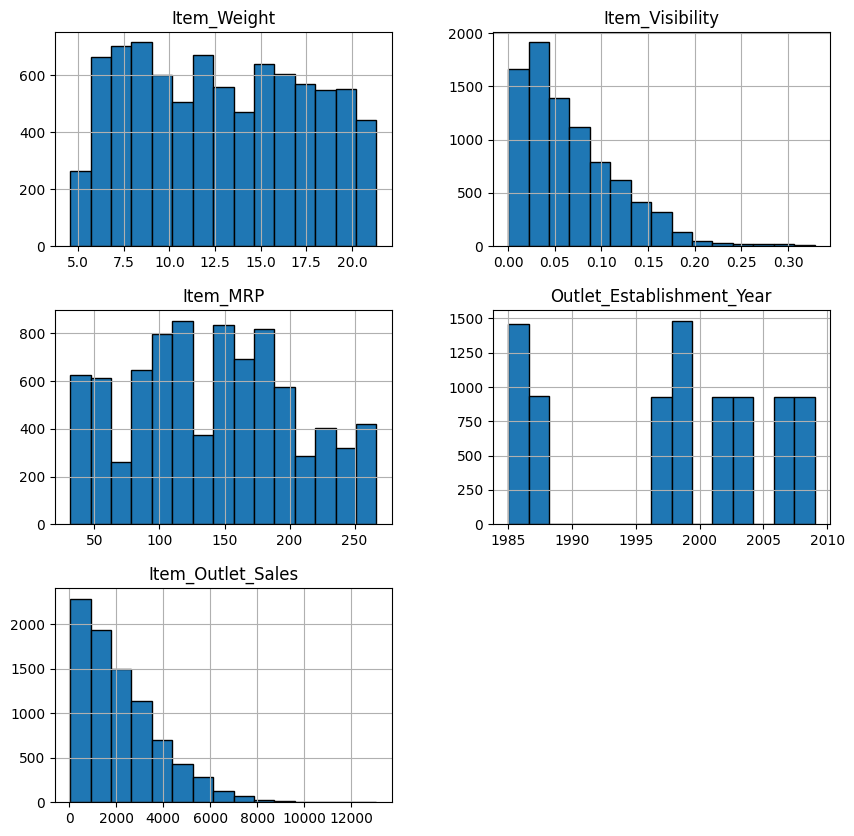

In [33]:
df.hist(figsize=(10,10), edgecolor = "black", bins= 15);
# "Outlet_Establisment_Year" es categórico, por eso el grafico no se ve continuo.

/var/folders/kj/npnp2hyx5mv_ccn5jlth23tr0000gn/T/ipykernel_26392/2225031643.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


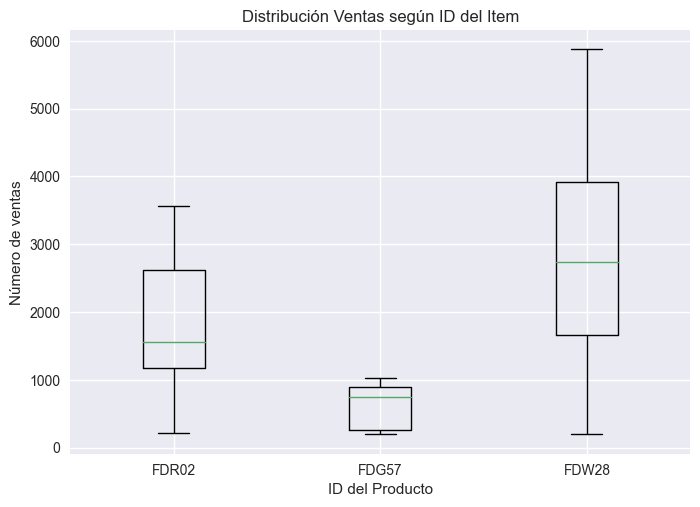

In [34]:
import random as rd
plt.style.use('seaborn')

n1 = rd.randint(0,len(df["Item_Identifier"].unique()))
val1 = df["Item_Identifier"].unique()[n1]

n2 = rd.randint(0,len(df["Item_Identifier"].unique()))
val2 = df["Item_Identifier"].unique()[n2]

n3 = rd.randint(0,len(df["Item_Identifier"].unique()))
val3 = df["Item_Identifier"].unique()[n3]

identificador_1 = df.loc[df['Item_Identifier']==val1,'Item_Outlet_Sales'].values
identificador_2 = df.loc[df['Item_Identifier']==val2,'Item_Outlet_Sales'].values
identificador_3 = df.loc[df['Item_Identifier']==val3,'Item_Outlet_Sales'].values

plt.boxplot([identificador_1,identificador_2, identificador_3 ], labels=[val1, val2, val3]);
plt.xlabel("ID del Producto")
plt.ylabel("Número de ventas")
plt.title("Distribución Ventas según ID del Item");

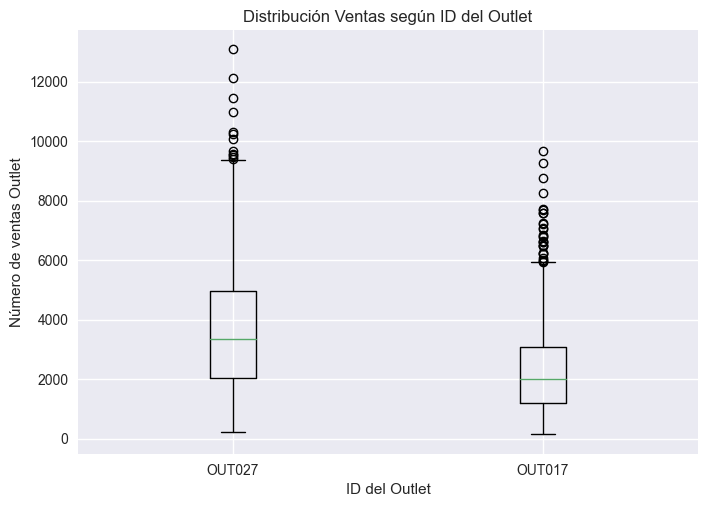

In [35]:
#Comparemos ventas a partir de 2 Outlets

n4 = rd.randint(0,len(df["Outlet_Identifier"].unique()))
val4 = df["Outlet_Identifier"].unique()[n4-1]

n5 = rd.randint(0,len(df["Outlet_Identifier"].unique()))
val5 = df["Outlet_Identifier"].unique()[n5-1]


identificador_4 = df.loc[df['Outlet_Identifier']==val4,'Item_Outlet_Sales'].values
identificador_5 = df.loc[df['Outlet_Identifier']==val5,'Item_Outlet_Sales'].values



plt.boxplot([identificador_4,identificador_5], labels=[val4, val5]);
plt.xlabel("ID del Outlet")
plt.ylabel("Número de ventas Outlet")
plt.title("Distribución Ventas según ID del Outlet");


/var/folders/kj/npnp2hyx5mv_ccn5jlth23tr0000gn/T/ipykernel_26392/333739280.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Reds', annot=True);


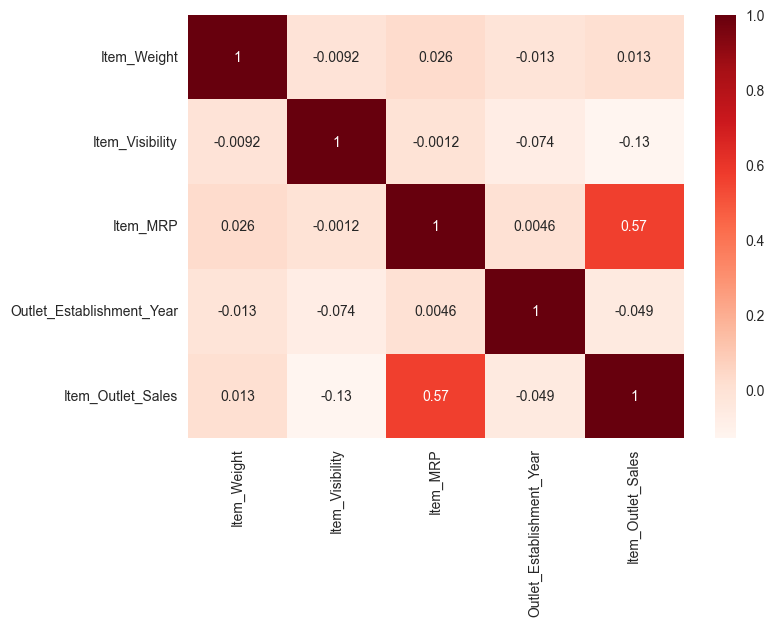

In [36]:
sns.heatmap(df.corr(), cmap = 'Reds', annot=True);

## Parte 4

El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.
Para la cuarta parte, la tarea es crear numerosas visualizaciones de datos para ayudar a las partes interesadas a comprender mejor las tendencias de los datos. No duden en ser creativos esta semana. Esta es su oportunidad para distinguir sus proyectos de otros con visualizaciones y análisis.
• Aprovechen sus limpiezas, exploraciones y análisis anteriores. 
• Creen un mínimo de dos visualizaciones de datos para ayudar a otros comprender las tendencias en los datos (análisis de datos explicativos).
• Puesto que estos gráficos son para la elaboración de informes, asegúrense de que tengan un buen aspecto incluyendo títulos, leyendas, etc.

In [37]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987.0,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002.0,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004.0,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,1845.5976


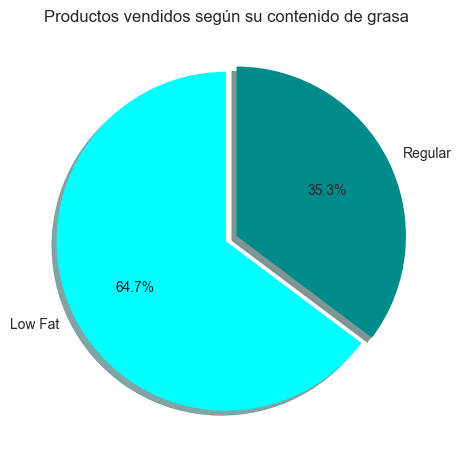

In [38]:
# Gráfico 1
# Vemaos si hay una tendencia por parte de los cinsumidores de consumir alimentos saludables
colores = ["cyan", "darkcyan"]
plt.pie(df["Item_Fat_Content"].value_counts().values, 
labels = df["Item_Fat_Content"].value_counts().index, autopct='%.1f%%', startangle= 90 ,
explode = (0,0.07),colors = colores, shadow = True);
plt.title("Productos vendidos según su contenido de grasa");

# A partir del gráfico de torta, podemos concluir que gran parte de los clientes compran alimentos bajo en grasa.
# Por lo que signficica que están concientes de vivir una vida saludable.


/var/folders/kj/npnp2hyx5mv_ccn5jlth23tr0000gn/T/ipykernel_26392/1240871732.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


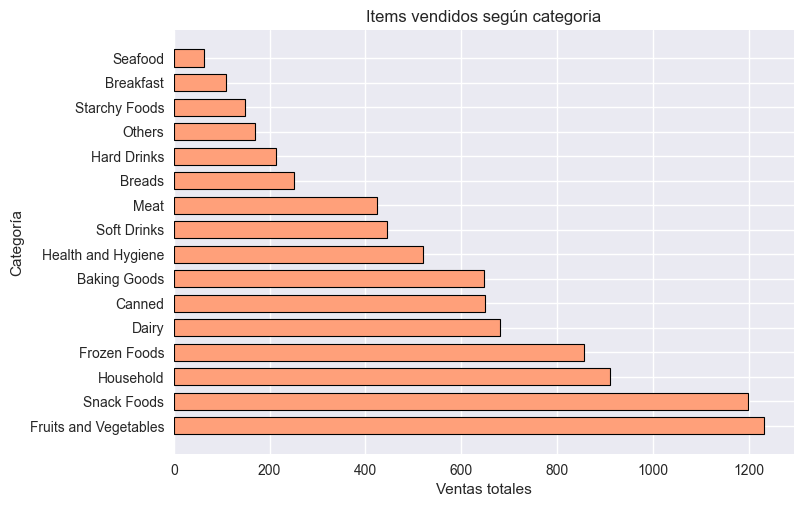

In [39]:
# Gráfico 2
# Veamos las categorias más y menos vendidas

plt.style.use('seaborn')
df["Item_Type"].value_counts()
plt.barh(df["Item_Type"].value_counts().index,df["Item_Type"].value_counts().values, 
height = 0.7, edgecolor = "black", linewidth = 0.8,color = ["lightsalmon"] )
plt.title("Items vendidos según categoria")
plt.xlabel("Ventas totales")
plt.ylabel("Categoría");

# Junto con el gráfico anterior, este nuevo afirma el bienestar de las personas, ya que podemos notar que las 
# frutas y vegetales son indispensables en las comidas de los hogares. Sin embargo, a pesar de que los alimentos
# provenientes del mar sean nutritivos, vemos una baja demanda, seguramente debido al alto precio de estos y la
# gran cantidad de susittutos para este (por ejemplo la carne que también aporta proteínas)

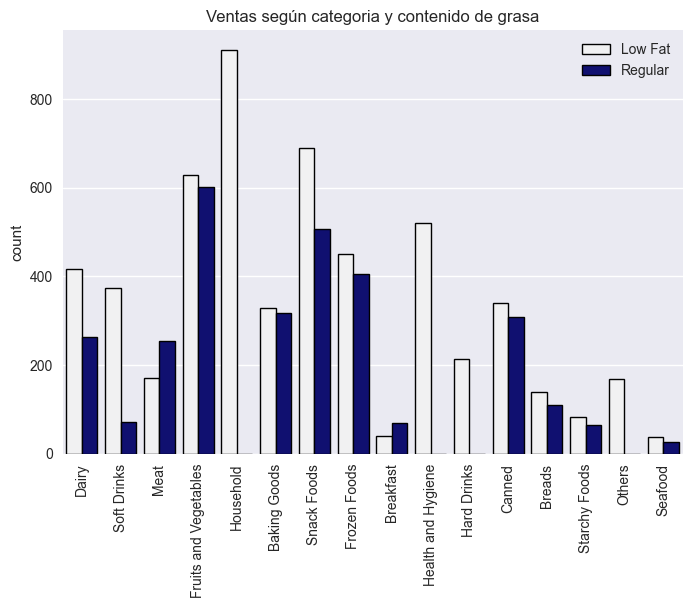

In [40]:
#Gráfico 3 y 4 (Alternativos)

#Gráfico 3 (Alternativa 1)
#Veamos más a profundidad las ventas por categorías
data =  list(df["Item_Type"])
group = list(df["Item_Fat_Content"])

# Count plot con seaborn
sns.countplot(x = data, hue = group , edgecolor = "black" , width = 0.8 , color = "navy", linewidth = 1)
plt.xticks(rotation = 90);
plt.title("Ventas según categoria y contenido de grasa");


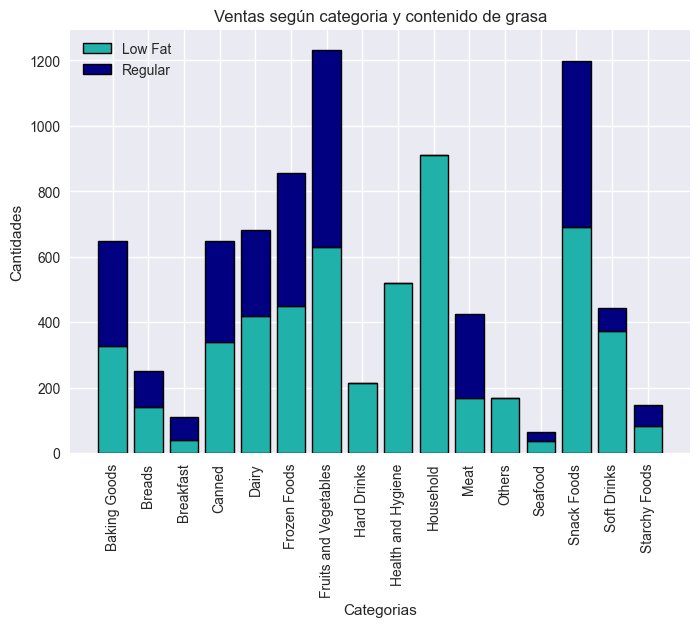

In [41]:
#Gráfico 4 (Alternativa 2) stacked graph
df2 = df.groupby("Item_Type")[["Item_Fat_Content"]].value_counts()
df2 = df2.reset_index()
filtro_lowfat = df2["Item_Fat_Content"] == "Low Fat"

#----- FUENTE: https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/ ----
x = list(df2.loc[filtro_lowfat,:]["Item_Type"])
y1 = list(df2.loc[filtro_lowfat,:][0])
y2 = list(df2.loc[~filtro_lowfat,:][0])

# hay categorias sin ventas de productos low fat, por lo que vamos a agregar 0 a esos valores
# para igualar los largos de las listas
y2.insert(7,0)
y2.insert(8,0)
y2.insert(9,0)
y2.insert(11,0)

plt.bar(x, y1, color='lightseagreen', edgecolor = "k" , linewidth = 1)
plt.bar(x, y2, bottom=y1, color='navy' , edgecolor = "k" , linewidth = 1)
# ----------------------------------------------------------------------------------------
plt.xticks(rotation = 90);
plt.legend(["Low Fat", "Regular"]);
plt.xlabel("Categorias")
plt.ylabel("Cantidades")
plt.title("Ventas según categoria y contenido de grasa");
# Podemos notar, a pesar de que las frutas y verduras sean la categoría más demandada, que la distribución
# en contenido grasoso es aproximadamente 50/50 en esta categoria. Esto se debe a que hay vegetales
# que contienen grasa saludable (por ejemplo la palta). En snack food se puede ver algo parecido, suponiendo que hablamos
# de alimentos procesados y con quimicos, tambien hay una distribución 50/50 (no se compra con alto contenido de grasa
# debido al daño que hacen)
# Para el caso de HouseHold, se puede ver que no hay contenido regular en grasas porque hablamos de productos de casa (
# almohadas, microondas, colador, entre otros) por lo que obligadamente estan en la categoria low fat debido a que es otra
# forma de decir que no tiene grasa (debería haber una categoria sin grasa)


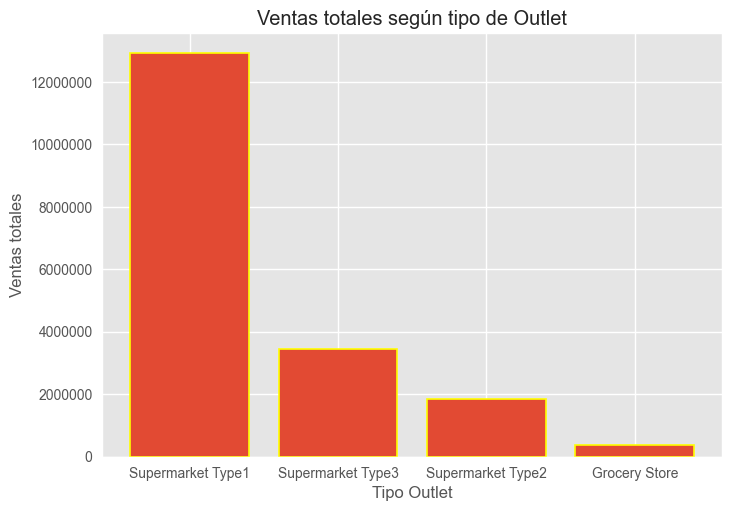

In [42]:
#Gráfico 5
plt.style.use('ggplot')
datos = df.groupby("Outlet_Type")["Item_Outlet_Sales"].sum()
datos = datos.sort_values(ascending = False)
plt.bar(datos.index,datos.values , edgecolor = "yellow", linewidth = 1.2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Ventas totales según tipo de Outlet")
plt.xlabel("Tipo Outlet")
plt.ylabel("Ventas totales");
# Por lejos vemos que la tienda con mayores ventas es el supermercado tipo 1 (¿Por qué?)

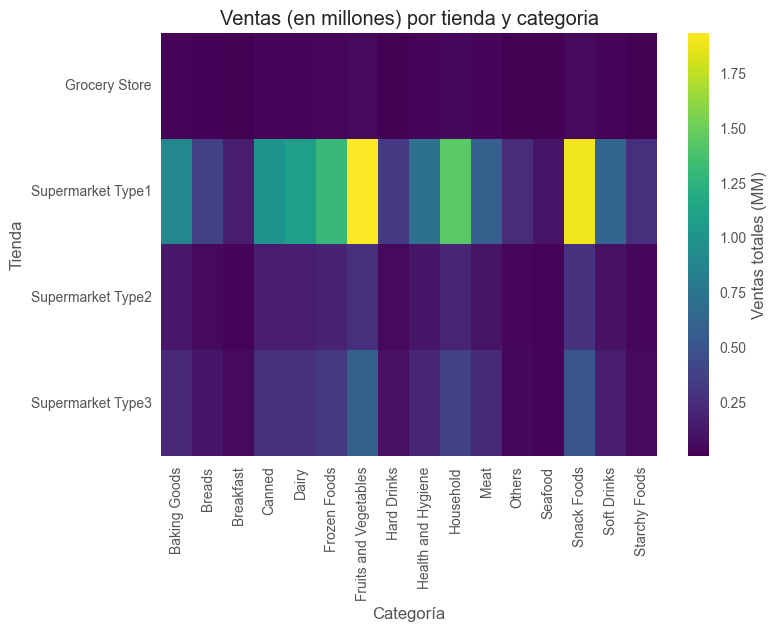

In [43]:
# Gráfico 6
aux = df.groupby(["Outlet_Type", "Item_Type"])["Item_Outlet_Sales"].sum().sort_values(ascending = False)
aux = aux.reset_index()
aux["Item_Outlet_Sales"] = aux["Item_Outlet_Sales"] / 1000000
# ------------------------------------------------- FUENTE: Chat GPT -------------------------------------
# Utilizamos pivot_table para reorganizar los datos para el heatmap
heatmap_data = pd.pivot_table(aux, values='Item_Outlet_Sales', index=['Outlet_Type'], columns=['Item_Type'])

# Creamos el heatmap utilizando seaborn
sns.heatmap(heatmap_data, cmap='viridis', annot=False, cbar_kws={'label': 'Ventas totales (MM)'});
# --------------------------------------------------------------------------------------------------------
plt.title('Ventas (en millones) por tienda y categoria')
plt.xlabel('Categoría')
plt.ylabel('Tienda');
# podemos cocluir que el superercado tipo 1 es el outlet con mayores ventas debido al elevado numero de ventas de 
# muchas de sus categorias, siendo sus categorias estrellas "Frutas y vegetales" y "Snack Food". Mientras que el resto
# de las tiendas tiene muy pocas ventas en sus diversas categorías. Esta diferencia significante se puede deber a 
# que el supermercado tipo 1 tiene tamaños pequeñas, medianas y la unica con grandes, por lo que seguramente estas están
# ubicadas en sitios poblados, mientras que el resto de los tipos tienen pequeñas o medianas (para un sector menos poblado seguramente)

## Parte 5

Para la parte 5, regresarán al conjunto de datos original con el objetivo de evitar una fuga de datos.  

Nota: Si imputaron los valores faltantes basados en un cálculo en todo el conjunto de datos (como la media), ahora deben realizar ese paso después de hacer train test split usando SimpleImputer.  

In [55]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import set_config
set_config(display='diagram')


In [62]:
df = pd.read_csv("/Users/jpyolito/Desktop/Coding_Dojo/Proyect1/foodsales_predictions.csv")


In [60]:
df.info() # 1 solo object con valores nulos y un float con valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [63]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [68]:
# Codificación ordinal "Item_Fat_Content" y "Outlet_Size"
replacement_dictionary = {'Low Fat':0, 'Regular':1, 'LF':0, 'reg':1, "low fat":0}
df['Item_Fat_Content'].replace(replacement_dictionary, inplace=True)

replacement_dictionary2 = {'Small':0, 'Medium':1, 'High':2}
df['Outlet_Size'].replace(replacement_dictionary2, inplace=True)



In [69]:
# Dividan
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [73]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [71]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

# Scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [72]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)

# categoric pipeline
categoric_pipe = make_pipeline(freq_imputer, ohe)


In [74]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categoric_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x12ab71550>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x12ab075b0>)])

In [75]:
# fit on train
preprocessor.fit(X_train)

/Users/jpyolito/Library/Python/3.8/lib/python/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x12ab71550>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x12ab075b0>)])

In [76]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [77]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed



0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1589)




array([[ 0.81724868, -0.7403206 , -0.71277507, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 ,  1.35076614, -1.29105225, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.35076614,  1.81331864, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.7403206 , -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.7403206 , -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.7403206 , -0.95867683, ...,  1.        ,
         0.        ,  0.        ]])

In [78]:
pd.DataFrame(X_train_processed)

,0,1,2,3,4,5,6,7,8,9,...,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588
0,0.817249,-0.740321,-0.712775,1.828109,1.327849,0.407785,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,1.350766,-1.291052,0.603369,1.327849,0.407785,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.131512,1.350766,1.813319,0.244541,0.136187,0.407785,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-0.740321,-1.004931,-0.952591,0.732018,-1.291630,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.740321,-0.965484,-0.336460,0.493686,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.832409,1.350766,4.309657,-0.044657,0.017021,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.639356,-0.740321,1.008625,-1.058907,1.089517,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,1.113736,-0.740321,-0.920527,1.523027,0.493686,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,1.766009,-0.740321,-0.227755,-0.383777,1.089517,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
